### Imports

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("husl")
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, AvgPool2D, Dropout, Flatten, Activation, ReLU
from keras.metrics import binary_accuracy, categorical_accuracy
from keras.utils import to_categorical

### Load dataset

In [124]:
labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
data = pd.read_csv('data/FER2013/train.csv')

X = []
for index, row in data.iterrows():
    image_pixels = np.asarray(list(row['pixels'].split(' ')), dtype=np.uint8)
    image_pixels = image_pixels.reshape((48,48))
    X.append(image_pixels)
X = np.array(X)
X = np.expand_dims(X, 3)

y = to_categorical(data['emotion'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

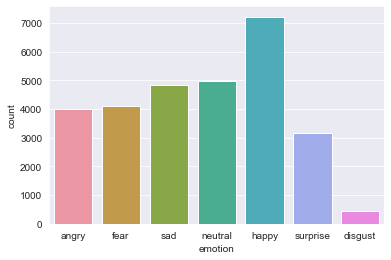

In [108]:
sns.countplot(data['emotion'].apply(lambda x : labels.get(x)));

From the above countplot graphic we can see that we have way more __*happy*__ samples than the rest of the other ones. Also, __*disgust*__ samples are almost 7 times less if compared to the category with more samples, __*happy*__.

We need to keep an eye on this imbalance on categories, once it may lead our model to bias towards happy labels and miss a lot of disgust samples.

### Models

####  Lenet

In [128]:
model = Sequential(name='LeNet-5')
# Layer C1 (convolution) - 6 feature maps 28x28
model.add(Conv2D(6, (5,5), strides=(1,1), input_shape=(48,48,1), name='C1', activation='relu'))

# Layer S2 (sub-sampling) - 6 feature maps 14x14
model.add(AvgPool2D(pool_size=(2,2), name='S2'))

# Layer C3 (convolution) - 16 feature maps 10x10
model.add(Conv2D(16, (5,5), strides=(1,1), name='C3', activation='relu'))

# Layer S4 (sub-samlping) - 16 feature maps 5x5
model.add(AvgPool2D(pool_size=(2,2), name='S4'))

# Layer C5 (convolution) - 16 feature maps 10x10 - Flattened layer
model.add(Conv2D(120, (4,4), strides=(1,1), name='C5', activation='relu'))
model.add(Flatten(name='C5-Flat'))
model.add(Dense(120, name='C5-Dense', activation='relu'))

# Layer F6 - Full connection 84
model.add(Dense(84, name='F6'))

# Output layer
model.add(Dense(7, activation='softmax', name='Output'))

model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Model: "LeNet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 44, 44, 6)         156       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 22, 22, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 18, 18, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 9, 9, 16)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 6, 6, 120)         30840     
_________________________________________________________________
C5-Flat (Flatten)            (None, 4320)              0         
_________________________________________________________________
C5-Dense (Dense)             (None, 120)               5185

In [129]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 22967 samples, validate on 5742 samples
Epoch 1/15
22967/22967 [==============================] - 22s 946us/step - loss: 1.7276 - accuracy: 0.3617 - val_loss: 1.5072 - val_accuracy: 0.4115
Epoch 2/15
22967/22967 [==============================] - 22s 937us/step - loss: 1.4532 - accuracy: 0.4378 - val_loss: 1.4313 - val_accuracy: 0.4471
Epoch 3/15
22967/22967 [==============================] - 21s 925us/step - loss: 1.3369 - accuracy: 0.4902 - val_loss: 1.4619 - val_accuracy: 0.4361
Epoch 4/15
22967/22967 [==============================] - 22s 945us/step - loss: 1.2104 - accuracy: 0.5416 - val_loss: 1.4173 - val_accuracy: 0.4612
Epoch 5/15
22967/22967 [==============================] - 21s 934us/step - loss: 1.0711 - accuracy: 0.5967 - val_loss: 1.5642 - val_accuracy: 0.4652
Epoch 6/15
22967/22967 [==============================] - 22s 939us/step - loss: 0.9021 - accuracy: 0.6624 - val_loss: 1.6701 - val_accuracy: 0.4570
Epoch 7/15
22967/22967 [==============================] -

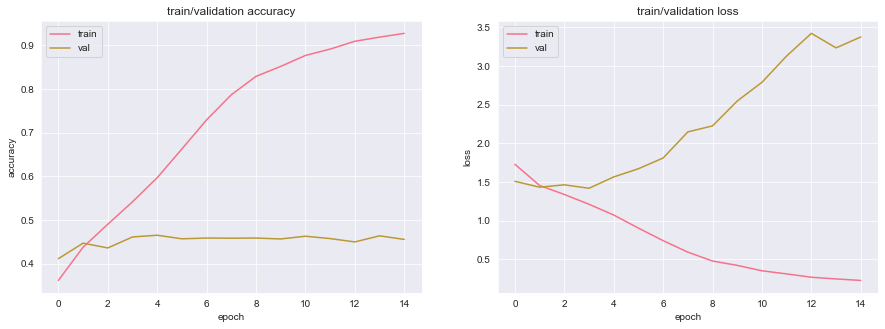

In [162]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].legend(['train', 'val'])
ax[0].set(title='train/validation accuracy', xlabel='epoch', ylabel='accuracy')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].legend(['train', 'val'])
ax[1].set(title='train/validation loss', xlabel='epoch', ylabel='loss')

plt.show()